In [13]:
import numpy as np
from PIL import Image
from cv2 import imwrite
import os
#from torchvision import transforms
import matplotlib.pyplot as plt
import cv2

In [60]:
gt_path="C:/Users/rxiao/Desktop/desktop/paper3/seg_4subtype_val_512/chromophobe_98.png"
img_path="C:/Users/rxiao/Desktop/desktop/paper3/test/chromophobe_98.png"

In [61]:
gt=np.array(Image.open(gt_path).convert('L')).astype(np.float32)//225
img=np.array(Image.open(img_path).convert('L')).astype(np.float32)//225

(<matplotlib.image.AxesImage at 0x1eb14e60f60>, (-0.5, 511.5, 511.5, -0.5))

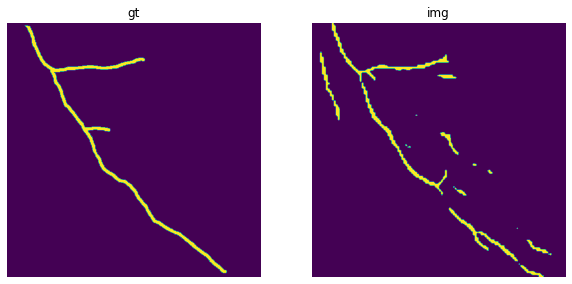

In [62]:
#plt.figure("Image") 
plt.figure(figsize=(10,5)) 
#plt.suptitle('Multi_Image') 
plt.subplot(1,2,1), plt.title('gt')
plt.imshow(gt), plt.axis('off')
plt.subplot(1,2,2), plt.title('img')
plt.imshow(img), plt.axis('off') 


(<matplotlib.image.AxesImage at 0x1eb1b6d8e10>, (-0.5, 511.5, 511.5, -0.5))

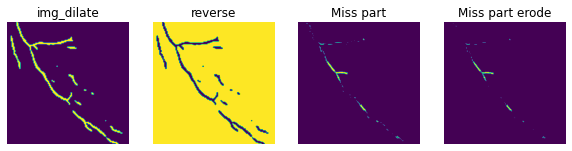

In [63]:
kernel3 = np.ones((3,3),np.uint8)
kernel2 = np.ones((2,2),np.uint8)

img_dilate = cv2.dilate(img,kernel3)
M = gt * (1-img_dilate)
Missed = cv2.erode(M,kernel2)

plt.figure(figsize=(10,5)) 
#plt.suptitle('Multi_Image') 
plt.subplot(1,4,1), plt.title('img_dilate')
plt.imshow(img_dilate), plt.axis('off')
plt.subplot(1,4,2), plt.title('reverse')
plt.imshow(1-img_dilate), plt.axis('off') 
plt.subplot(1,4,3), plt.title('Miss part')
plt.imshow(M), plt.axis('off') 
plt.subplot(1,4,4), plt.title('Miss part erode')
plt.imshow(Missed), plt.axis('off') 


(<matplotlib.image.AxesImage at 0x1eb1b436978>, (-0.5, 511.5, 511.5, -0.5))

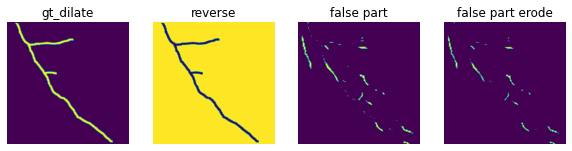

In [64]:
kernel3 = np.ones((3,3),np.uint8)
kernel2 = np.ones((2,2),np.uint8)

gt_dilate = cv2.dilate(gt,kernel3)
F = img * (1-gt_dilate)
Falsed = cv2.erode(F,kernel2)

# 这里必须加 cmap='gray' ,否则尽管原图像是灰度图（下图1），但是显示的是伪彩色图像（下图2）（如果不加的话）
plt.figure(figsize=(10,5)) #设置窗口大小
#plt.suptitle('Multi_Image') # 图片名称
plt.subplot(1,4,1), plt.title('gt_dilate')
plt.imshow(gt_dilate), plt.axis('off')
plt.subplot(1,4,2), plt.title('reverse')
plt.imshow(1-gt_dilate), plt.axis('off') 
plt.subplot(1,4,3), plt.title('false part')
plt.imshow(F), plt.axis('off') 
plt.subplot(1,4,4), plt.title('false part erode')
plt.imshow(Falsed), plt.axis('off') 

In [65]:
def cal_pixcels(gt, img, Missed,Falsed):
    x,y= Missed.shape
    gk = 0
    ik = 0 
    mk = 0
    fk = 0
    out = 0
    for i in range(x):    
        for j in range(y):
            if gt[i,j]==1:            
                gk+=1
            if img[i,j]==1:            
                ik+=1
            if Missed[i,j]==1:            
                mk+=1
            if Falsed[i,j]==1:            
                fk+=1
    MR = mk/gk
    FA = fk/ik
    out = 1- (MR+FA)/2
    print(gk,ik,mk,fk)
    print("Missed:", round(MR*100,2),'%')
    print("Falsed:", round(FA*100,2),'%')
    print("Out:", round(out*100,2),'%')


In [66]:
cal_pixcels(gt, img, Missed, Falsed)

6180 7925 979 2578
Missed: 15.84 %
Falsed: 32.53 %
Out: 75.81 %
